In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Lagrangian RW Vectorized

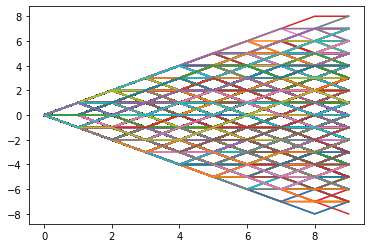

In [2]:
num_time_steps = 10
num_walkers = 10000

x_over_time = np.zeros((num_walkers,num_time_steps))

steps = np.random.choice([-1,0,1],size=(num_walkers,num_time_steps))
#steps = np.random.choice([-1,0,1],size=(num_walkers,num_time_steps))
steps[:,0] = np.zeros(num_walkers) #<---- I added this line so that we see the starting position (ie no one moves on the first time step)

x_over_time = np.cumsum(steps,axis=1)


    
plt.figure()
_ = plt.plot(np.transpose(x_over_time))

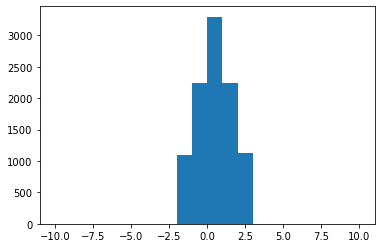

In [3]:
t=2
L=10
bins = np.arange(-L,L+1)
_ = plt.hist(x_over_time[:,t],bins=bins)


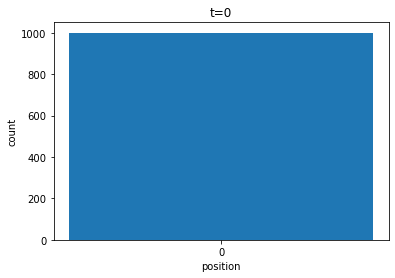

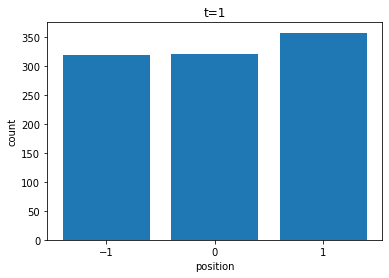

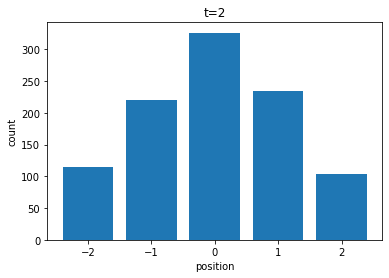

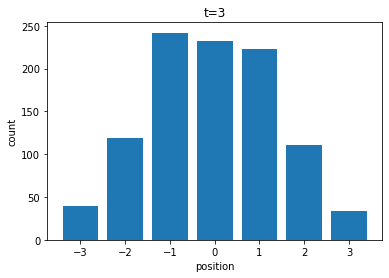

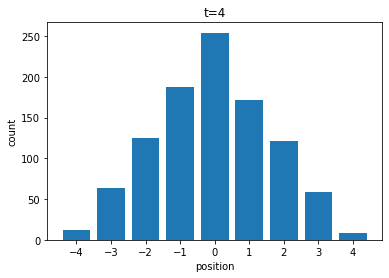

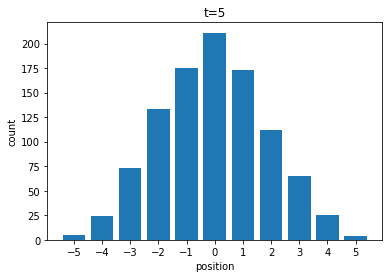

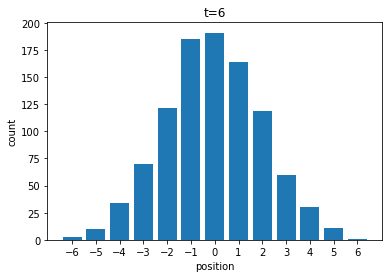

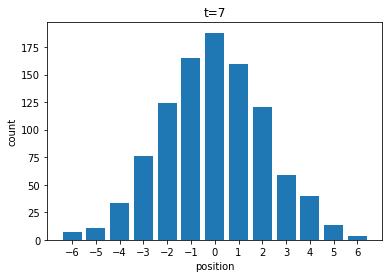

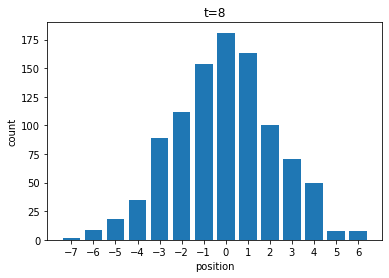

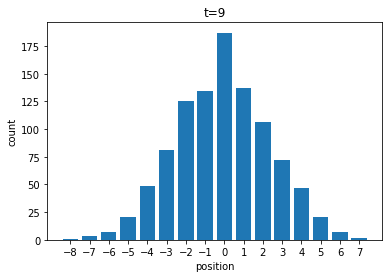

In [83]:
for t in range(10):
    plt.figure()
    #plt.hist(x_over_time[:,t],bins=bins)
    labels, counts = np.unique(x_over_time[:,t], return_counts=True)
    plt.bar(labels, counts, align='center')
    plt.gca().set_xticks(labels)
    plt.title('t='+str(t))
    plt.xlabel('position')
    plt.ylabel('count')
    plt.show()

# Now let's try Eulerian approach

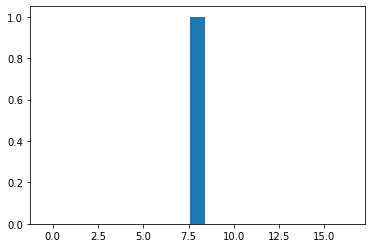

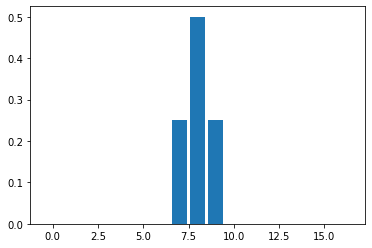

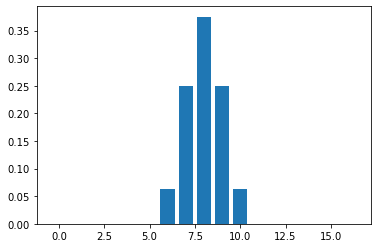

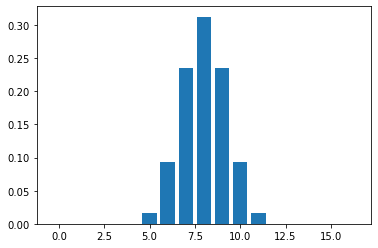

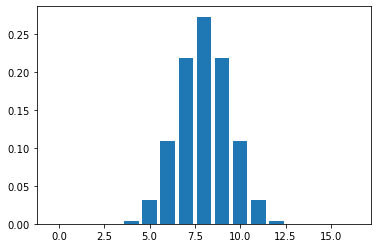

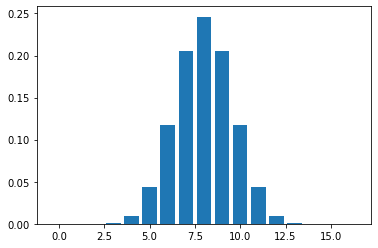

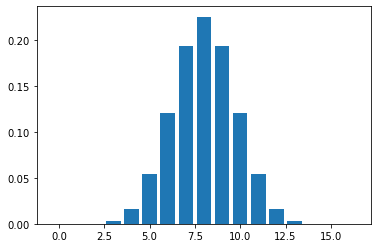

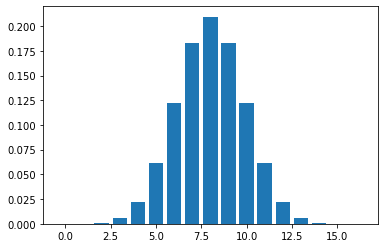

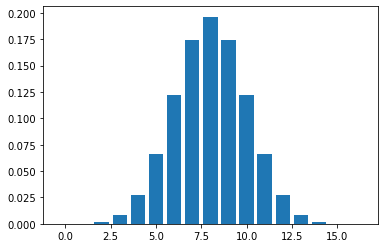

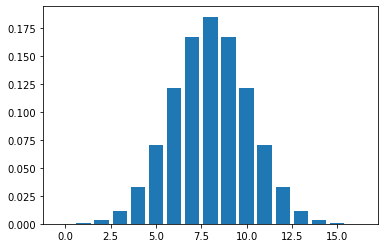

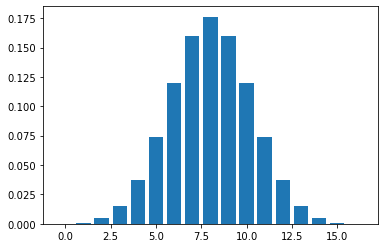

In [21]:
########################
### parameters
########################
num_time_steps = 10
num_sites = 16+1

alpha = .5 # probability that each walker moves at all

########################
### set up
########################


N = np.zeros(num_sites) #make our list of site densities
N[int(np.floor(num_sites/2))] = 1 #put all of our walker density in a middle site
N_next_step = np.zeros(num_sites) #create a space to put our 'updated' world

plt.figure()
plt.bar(range(num_sites),N)
########################
### run
########################
for t in range(num_time_steps):
    for i in range(num_sites):
        N_next_step[i] = N[i] - alpha*N[i] + alpha/2*N[i-1] + alpha/2*N[(i+1)%num_sites] #using poeriodic boundary conditions
    N = N_next_step
    N_next_step = np.zeros(num_sites)
    
    plt.figure()
    plt.bar(range(num_sites),N)

# now let's vectorize

<BarContainer object of 17 artists>

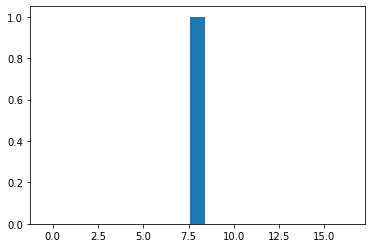

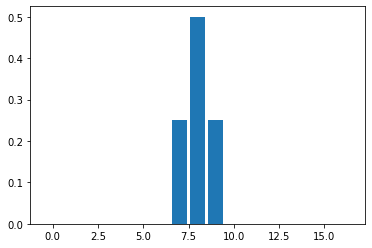

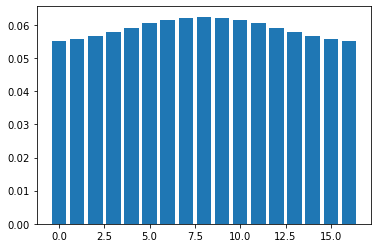

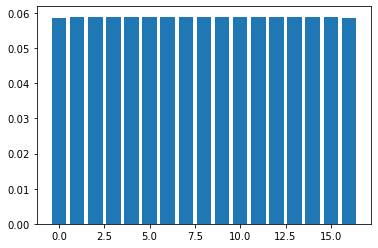

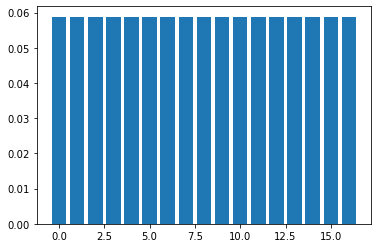

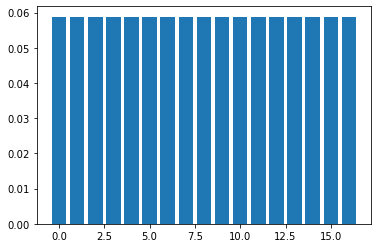

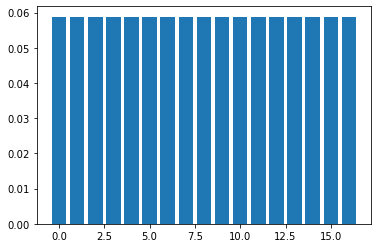

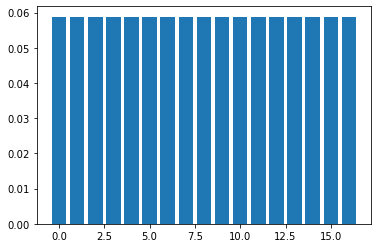

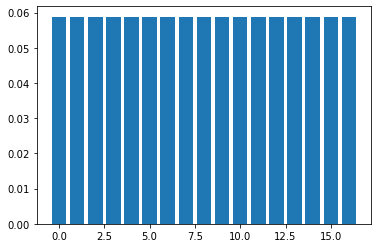

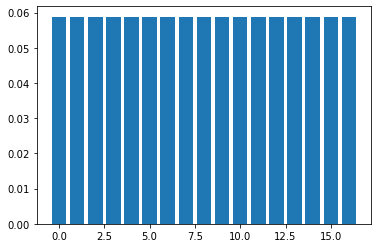

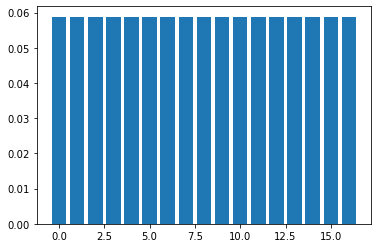

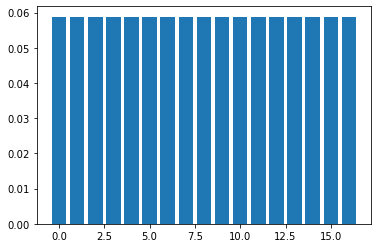

In [30]:
########################
### parameters
########################
num_time_steps = 1000
num_sites = 16+1

alpha = .5 # probability that each walker moves at all

########################
### set up
########################


N = np.zeros(num_sites) #make our list of site densities
N[int(np.floor(num_sites/2))] = 1 #put all of our walker density in a middle site


plt.figure()
plt.bar(range(num_sites),N)
########################
### run
########################
for t in range(num_time_steps):
    stay = (1-alpha)*N
    left = alpha*N/2
    right = alpha*N/2
    
    N = stay + np.roll(left,-1) + np.roll(right,1)
    
    if(t%100==0):
        plt.figure()
        plt.bar(range(num_sites),N)
    
plt.figure()
plt.bar(range(num_sites),N)

In [25]:
print(np.arange(10))
np.roll(np.arange(10),-1)

[0 1 2 3 4 5 6 7 8 9]


array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0])